#Import pandas to read dataframe

In [ ]:
import pandas as pd

#Load the data using pandas

In [ ]:
data=pd.read_excel("/content/homellc_dataset.xlsx")

In [ ]:
data


,S No,DATE,Population (Th),Interest Rate(%),Employement Rate,consumer price index rate,inflation rate,MORTGAGE rate,Real estate loan rate,total const spending,private housing units,House price index
0,1,2003-01-01,289412,1.24,130579,191.600,1.754286,5.3040,NaN,863855,1049,127.652
1,2,2003-02-01,289606,1.26,130443,192.800,1.912632,5.2200,NaN,859225,1044,128.326
2,3,2003-03-01,289809,1.25,130233,194.100,1.862857,5.0650,NaN,851132,1044,129.308
3,4,2003-04-01,290024,1.26,130176,193.700,1.774762,5.1175,NaN,859459,1043,130.488
4,5,2003-05-01,290250,1.26,130197,194.100,1.660952,4.8600,NaN,866814,1047,131.839
...,...,...,...,...,...,...,...,...,...,...,...,...
236,237,2022-09-01,333976,2.56,153682,322.979,2.382381,5.3500,2748.5202,1836930,1698,300.503
237,238,2022-10-01,334141,3.08,154006,324.476,2.393500,6.1450,2773.7038,1830477,1710,298.731
238,239,2022-11-01,334287,3.78,154296,325.493,2.371000,6.1375,2797.8572,1842206,1695,296.928
239,240,2022-12-01,334420,4.10,154535,327.600,2.259524,5.6680,2872.1440,1840896,1696,294.417


#Data preprocessing

In [ ]:
data.shape

(241, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   S No                        241 non-null    int64         
 1   DATE                        241 non-null    datetime64[ns]
 2   Population (Th)             241 non-null    int64         
 3   Interest Rate(%)            241 non-null    float64       
 4   Employement Rate            241 non-null    int64         
 5   consumer price  index rate  241 non-null    float64       
 6   inflation rate              241 non-null    float64       
 7   MORTGAGE rate               241 non-null    float64       
 8   Real estate loan rate       224 non-null    float64       
 9   total const spending        241 non-null    int64         
 10  private housing units       241 non-null    int64         
 11  House price index           241 non-null    float64       

In [ ]:
data = data.drop(columns=['S No','DATE'], axis=1)

In [ ]:
data.rename(columns={'Interest Rate(%)': 'Interest_Rate(%)','Employement Rate': 'Employement_Rate','inflation rate': 'inflation_rate','consumer price  index rate': 'CPI_rate','MORTGAGE rate': 'Mortgage_rate','Real estate loan rate': 'Real_estate_loan_rate','total const spending': 'total_const_spending','private housing units': 'private_housing_units','House price index': 'House_price_index'}, inplace=True)

In [ ]:
data.head()

,Population (Th),Interest_Rate(%),Employement_Rate,CPI_rate,inflation_rate,Mortgage_rate,Real_estate_loan_rate,total_const_spending,private_housing_units,House_price_index
0,289412,1.24,130579,191.6,1.754286,5.3040,NaN,863855,1049,127.652
1,289606,1.26,130443,192.8,1.912632,5.2200,NaN,859225,1044,128.326
2,289809,1.25,130233,194.1,1.862857,5.0650,NaN,851132,1044,129.308
3,290024,1.26,130176,193.7,1.774762,5.1175,NaN,859459,1043,130.488
4,290250,1.26,130197,194.1,1.660952,4.8600,NaN,866814,1047,131.839


In [ ]:
data['Real_estate_loan_rate'] = data['Real_estate_loan_rate'].fillna(method='ffill')


In [ ]:
print(data['Real_estate_loan_rate'].isnull().sum())


17


In [ ]:
data

,Population (Th),Interest_Rate(%),Employement_Rate,CPI_rate,inflation_rate,Mortgage_rate,Real_estate_loan_rate,total_const_spending,private_housing_units,House_price_index
0,289412,1.24,130579,191.600,1.754286,5.3040,NaN,863855,1049,127.652
1,289606,1.26,130443,192.800,1.912632,5.2200,NaN,859225,1044,128.326
2,289809,1.25,130233,194.100,1.862857,5.0650,NaN,851132,1044,129.308
3,290024,1.26,130176,193.700,1.774762,5.1175,NaN,859459,1043,130.488
4,290250,1.26,130197,194.100,1.660952,4.8600,NaN,866814,1047,131.839
...,...,...,...,...,...,...,...,...,...,...
236,333976,2.56,153682,322.979,2.382381,5.3500,2748.5202,1836930,1698,300.503
237,334141,3.08,154006,324.476,2.393500,6.1450,2773.7038,1830477,1710,298.731
238,334287,3.78,154296,325.493,2.371000,6.1375,2797.8572,1842206,1695,296.928
239,334420,4.10,154535,327.600,2.259524,5.6680,2872.1440,1840896,1696,294.417


In [ ]:
# For example, filling NaN with the mean of the column
data['Real_estate_loan_rate'].fillna(data['Real_estate_loan_rate'].mean(), inplace=True)


In [ ]:
data.tail()

,Population (Th),Interest_Rate(%),Employement_Rate,CPI_rate,inflation_rate,Mortgage_rate,Real_estate_loan_rate,total_const_spending,private_housing_units,House_price_index
236,333976,2.56,153682,322.979,2.382381,5.3500,2748.5202,1836930,1698,300.503
237,334141,3.08,154006,324.476,2.393500,6.1450,2773.7038,1830477,1710,298.731
238,334287,3.78,154296,325.493,2.371000,6.1375,2797.8572,1842206,1695,296.928
239,334420,4.10,154535,327.600,2.259524,5.6680,2872.1440,1840896,1696,294.417
240,334533,4.33,155007,330.768,2.237000,5.4250,2881.2685,1882199,1695,292.849


In [ ]:
data.duplicated().sum()

0

#Checking and removing Outliers by plotting

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def box_plot_uni(data: pd.DataFrame = None, column: str = None):
    sns.boxplot(data=data, x=column)
    plt.title(f'Distribution of {column}')

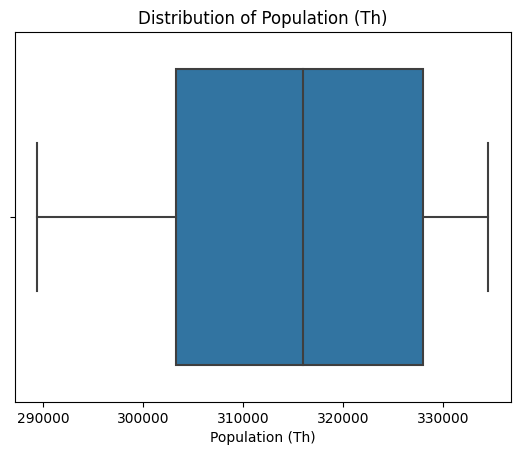

In [ ]:
box_plot_uni(data, 'Population (Th)')

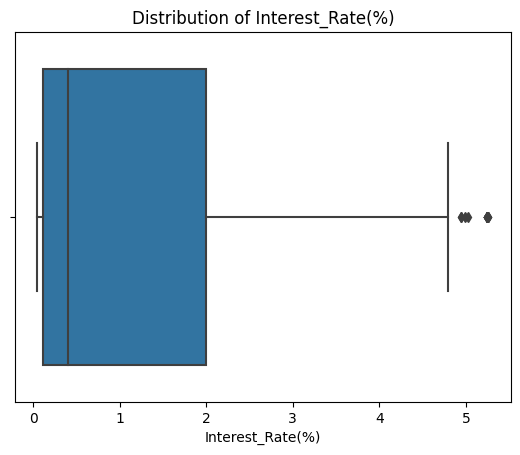

In [ ]:
box_plot_uni(data, 'Interest_Rate(%)')

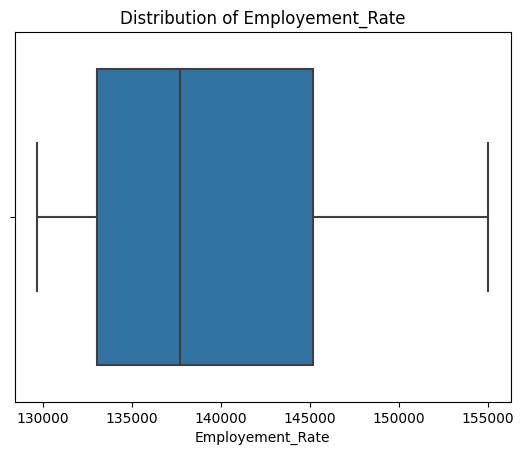

In [ ]:
box_plot_uni(data, 'Employement_Rate')

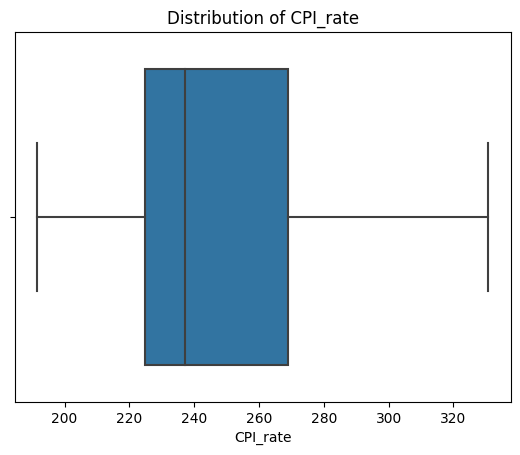

In [ ]:
box_plot_uni(data, 'CPI_rate')

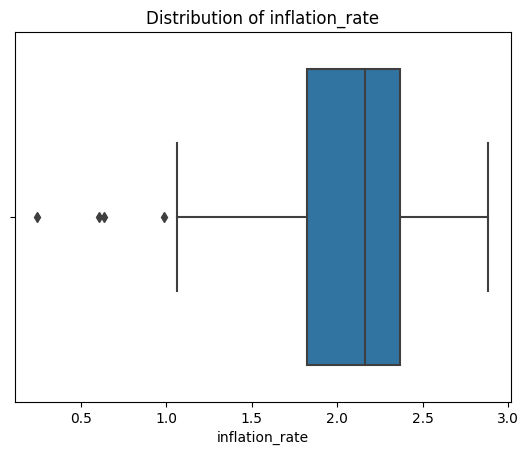

In [ ]:
box_plot_uni(data, 'inflation_rate')

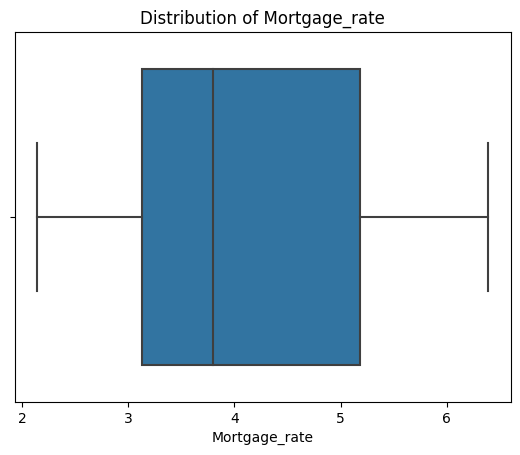

In [ ]:
box_plot_uni(data, 'Mortgage_rate')

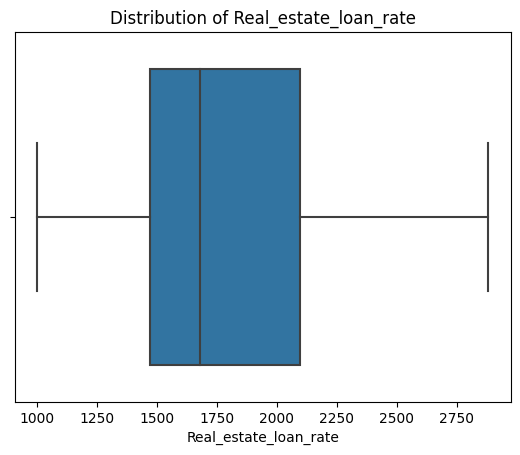

In [ ]:
box_plot_uni(data, 'Real_estate_loan_rate')

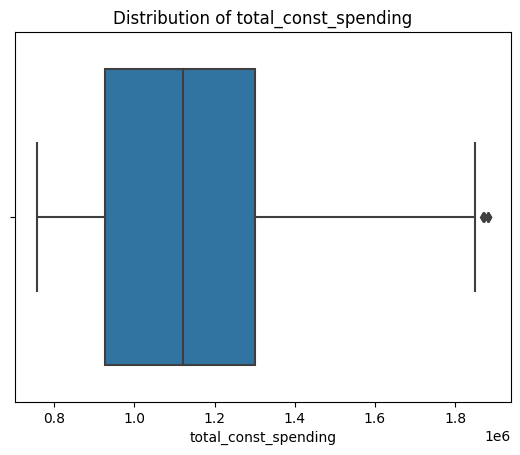

In [ ]:
box_plot_uni(data, 'total_const_spending')

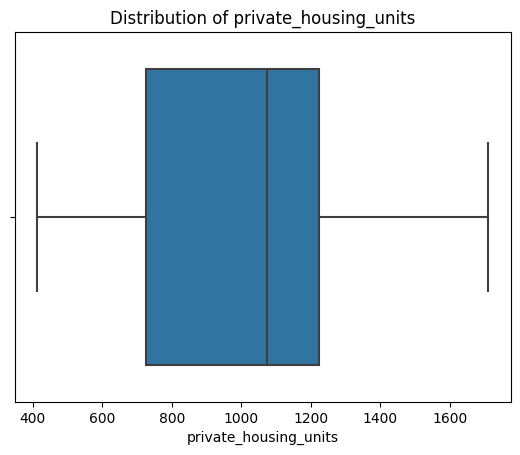

In [ ]:
box_plot_uni(data, 'private_housing_units')

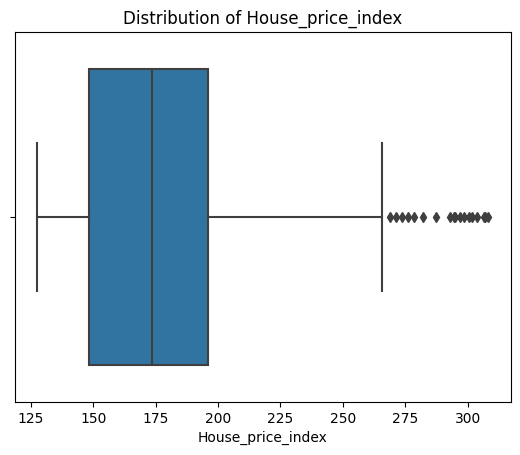

In [ ]:
box_plot_uni(data, 'House_price_index')

In [ ]:
def outliers_handing(data: pd.DataFrame, column: str):
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    upper_thersold = data[column].quantile(0.75) + (1.5 * iqr)
    lower_thersold = data[column].quantile(0.25) - (1.5 * iqr)
    print(f"IQR: {iqr}\nUpper_thersold: {upper_thersold}\nLower_thresold: {lower_thersold}")

In [ ]:
data.describe()

,Population (Th),Interest_Rate(%),Employement_Rate,CPI_rate,inflation_rate,Mortgage_rate,Real_estate_loan_rate,total_const_spending,private_housing_units,House_price_index
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,2.410000e+02,241.000000,241.000000
mean,314899.796680,1.314191,139280.912863,245.556942,2.073753,4.071197,1782.396860,1.154462e+06,1006.207469,181.126095
std,13748.604179,1.587253,7210.087489,32.723251,0.409566,1.205796,422.218222,2.832528e+05,340.211439,41.864691
min,289412.000000,0.050000,129700.000000,191.600000,0.246364,2.145000,1001.532700,7.583760e+05,414.000000,127.652000
25%,303280.000000,0.120000,133033.000000,224.930000,1.820909,3.128000,1471.286600,9.257320e+05,726.000000,148.169000
50%,316038.000000,0.400000,137689.000000,237.139000,2.162381,3.800000,1678.655000,1.121749e+06,1075.000000,173.451000
75%,327969.000000,2.000000,145189.000000,268.912000,2.368000,5.178000,2097.359400,1.300694e+06,1222.000000,196.119000
max,334533.000000,5.260000,155007.000000,330.768000,2.884000,6.390000,2881.268500,1.882753e+06,1710.000000,308.298000


In [ ]:
outliers_handing(data, 'Interest_Rate(%)')

IQR: 1.88
Upper_thersold: 4.82
Lower_thresold: -2.6999999999999997


In [ ]:
iqr = data['Interest_Rate(%)'].quantile(0.75) - data['Interest_Rate(%)'].quantile(0.25)
upper_thersold = data['Interest_Rate(%)'].quantile(0.75) + (1.5 * iqr)
lower_thersold = data['Interest_Rate(%)'].quantile(0.25) - (1.5 * iqr)
data['Interest_Rate(%)'] = data['Interest_Rate(%)'].clip(lower_thersold, upper_thersold)

In [ ]:
iqr = data['inflation_rate'].quantile(0.75) - data['inflation_rate'].quantile(0.25)
upper_thersold = data['inflation_rate'].quantile(0.75) + (1.5 * iqr)
lower_thersold = data['inflation_rate'].quantile(0.25) - (1.5 * iqr)
data['inflation_rate'] = data['inflation_rate'].clip(lower_thersold, upper_thersold)

In [ ]:
iqr = data['total_const_spending'].quantile(0.75) - data['total_const_spending'].quantile(0.25)
upper_thersold = data['total_const_spending'].quantile(0.75) + (1.5 * iqr)
lower_thersold = data['total_const_spending'].quantile(0.25) - (1.5 * iqr)
data['total_const_spending'] = data['total_const_spending'].clip(lower_thersold, upper_thersold)

In [ ]:
iqr = data['House_price_index'].quantile(0.75) - data['House_price_index'].quantile(0.25)
upper_thersold = data['House_price_index'].quantile(0.75) + (1.5 * iqr)
lower_thersold = data['House_price_index'].quantile(0.25) - (1.5 * iqr)
data['House_price_index'] = data['House_price_index'].clip(lower_thersold, upper_thersold)

In [ ]:
data.describe()


,Population (Th),Interest_Rate(%),Employement_Rate,CPI_rate,inflation_rate,Mortgage_rate,Real_estate_loan_rate,total_const_spending,private_housing_units,House_price_index
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,2.410000e+02,241.000000,241.000000
mean,314899.796680,1.288423,139280.912863,245.556942,2.080077,4.071197,1782.396860,1.154161e+06,1006.207469,179.387552
std,13748.604179,1.525391,7210.087489,32.723251,0.387951,1.205796,422.218222,2.824858e+05,340.211439,37.326521
min,289412.000000,0.050000,129700.000000,191.600000,1.000273,2.145000,1001.532700,7.583760e+05,414.000000,127.652000
25%,303280.000000,0.120000,133033.000000,224.930000,1.820909,3.128000,1471.286600,9.257320e+05,726.000000,148.169000
50%,316038.000000,0.400000,137689.000000,237.139000,2.162381,3.800000,1678.655000,1.121749e+06,1075.000000,173.451000
75%,327969.000000,2.000000,145189.000000,268.912000,2.368000,5.178000,2097.359400,1.300694e+06,1222.000000,196.119000
max,334533.000000,4.820000,155007.000000,330.768000,2.884000,6.390000,2881.268500,1.863137e+06,1710.000000,268.044000


#After Outlier removal

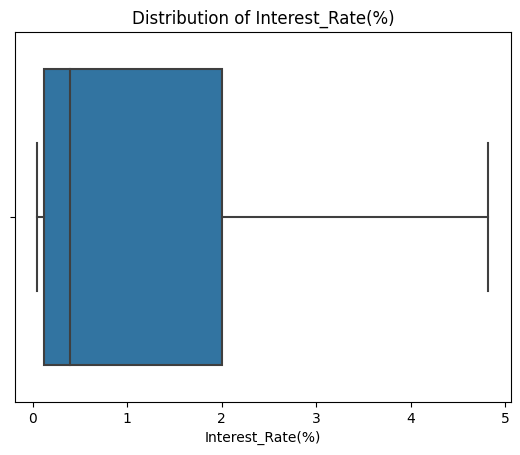

In [ ]:
box_plot_uni(data, 'Interest_Rate(%)')

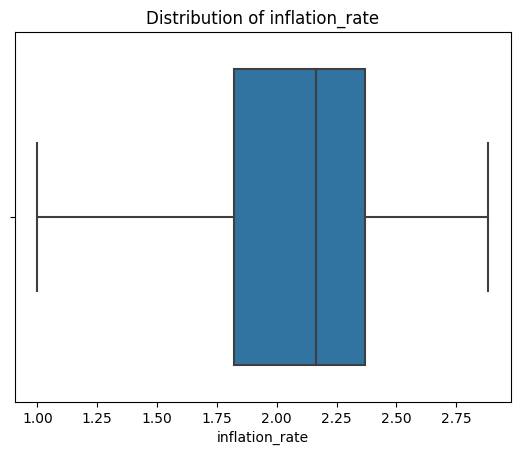

In [ ]:
box_plot_uni(data, 'inflation_rate')

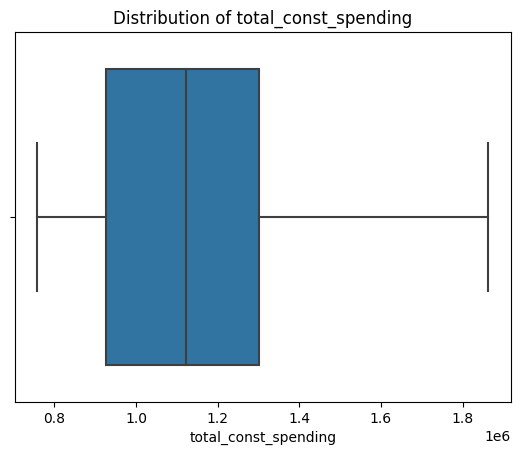

In [ ]:
box_plot_uni(data, 'total_const_spending')

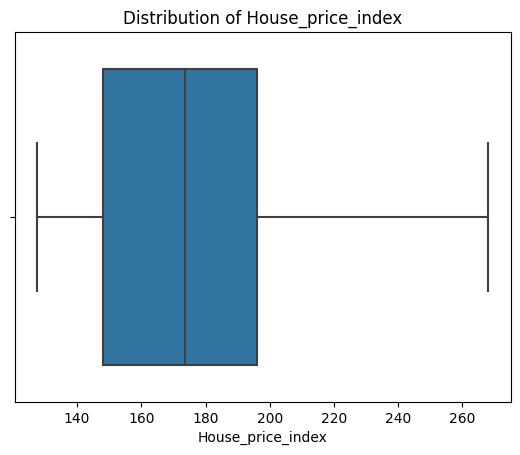

In [ ]:
box_plot_uni(data, 'House_price_index')

#Exploratory Data Analysis

Univariate analysis

In [ ]:
data.head()

,Population (Th),Interest_Rate(%),Employement_Rate,CPI_rate,inflation_rate,Mortgage_rate,Real_estate_loan_rate,total_const_spending,private_housing_units,House_price_index
0,289412,1.24,130579,191.6,1.754286,5.3040,1782.39686,863855,1049,127.652
1,289606,1.26,130443,192.8,1.912632,5.2200,1782.39686,859225,1044,128.326
2,289809,1.25,130233,194.1,1.862857,5.0650,1782.39686,851132,1044,129.308
3,290024,1.26,130176,193.7,1.774762,5.1175,1782.39686,859459,1043,130.488
4,290250,1.26,130197,194.1,1.660952,4.8600,1782.39686,866814,1047,131.839


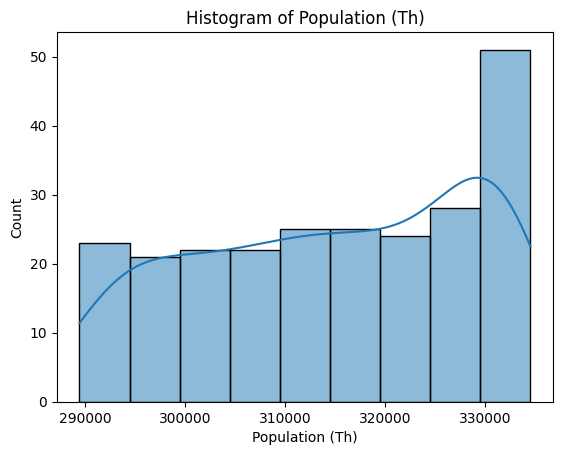

In [ ]:
def large_dataset_histogram(data, column):
    sns.histplot(data=data, x=column, kde=True, bins='auto')
    plt.title(f'Histogram of {column}')
    plt.show()
large_dataset_histogram(data=data, column='Population (Th)')

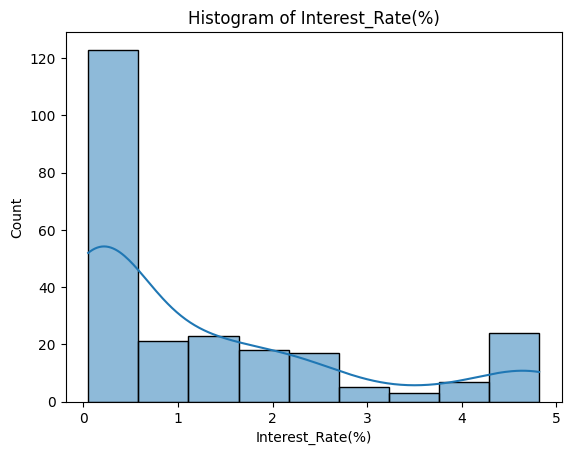

In [ ]:
large_dataset_histogram(data=data, column='Interest_Rate(%)')

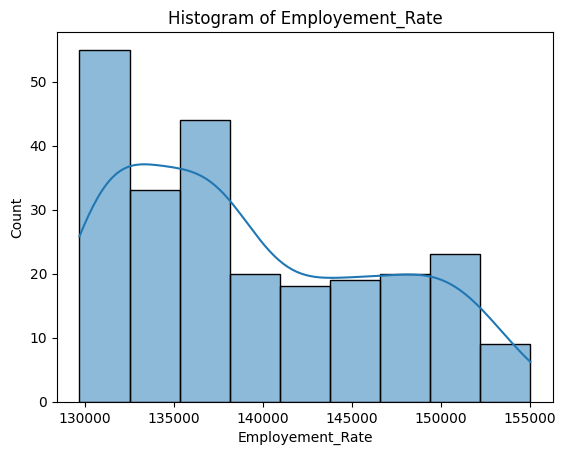

In [ ]:
large_dataset_histogram(data=data, column='Employement_Rate')

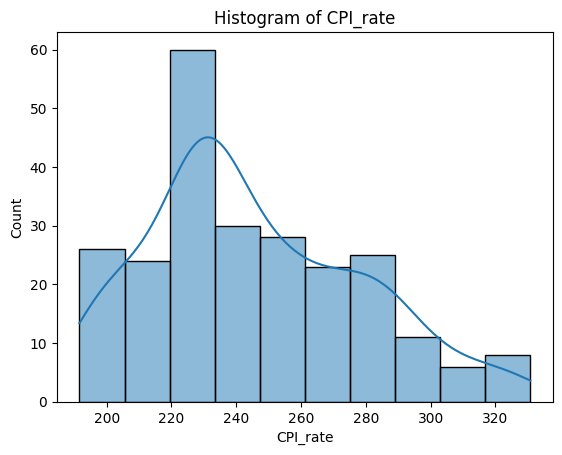

In [ ]:
large_dataset_histogram(data=data, column='CPI_rate')

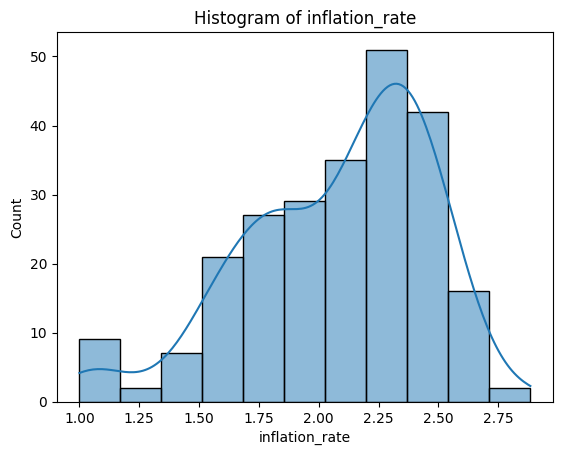

In [ ]:
large_dataset_histogram(data=data, column='inflation_rate')

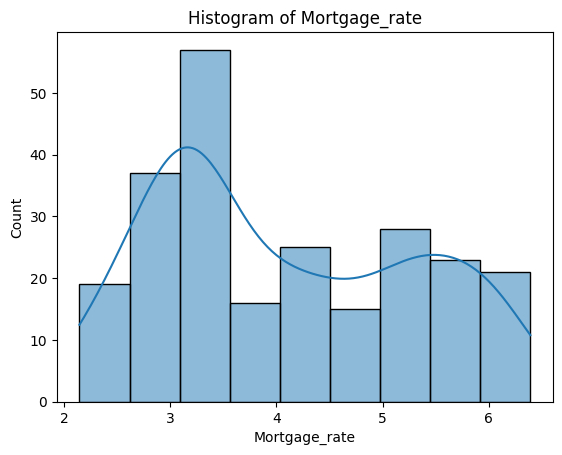

In [ ]:
large_dataset_histogram(data=data, column='Mortgage_rate')

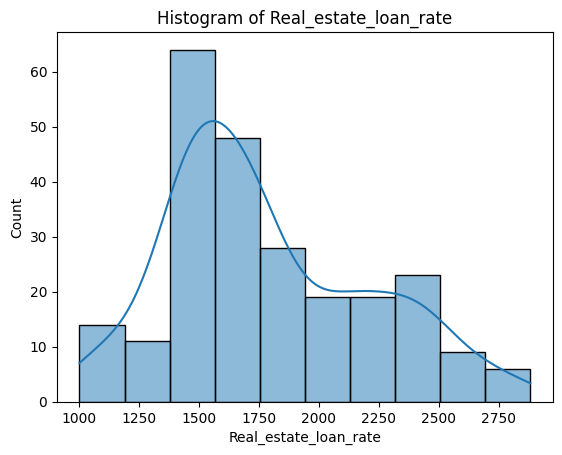

In [ ]:
large_dataset_histogram(data=data, column='Real_estate_loan_rate')

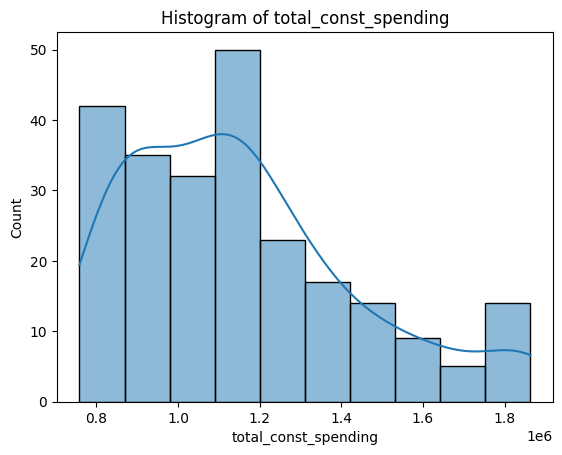

In [ ]:
large_dataset_histogram(data=data, column='total_const_spending')

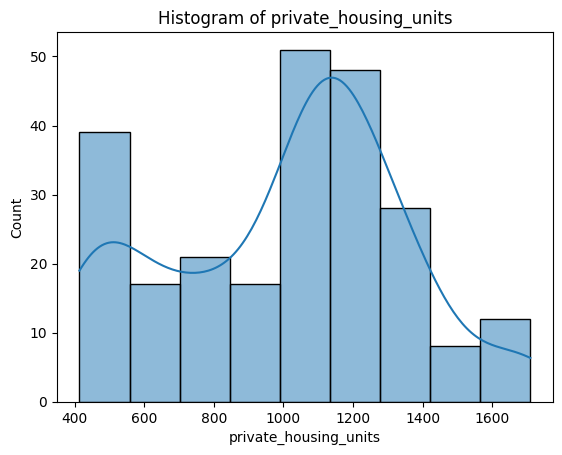

In [ ]:
large_dataset_histogram(data=data, column='private_housing_units')

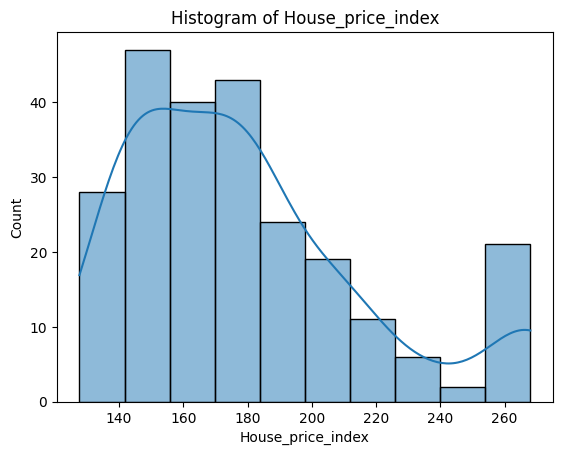

In [ ]:
large_dataset_histogram(data=data, column='House_price_index')

Bivariate Analysis

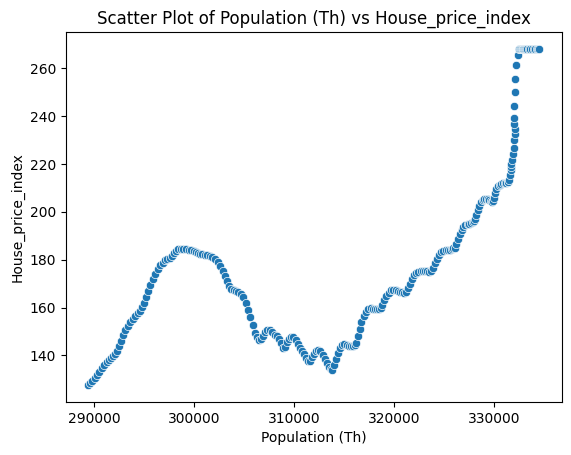

In [ ]:
def scatter_plot(data, x_column, y_column):
    sns.scatterplot(data=data, x=x_column, y=y_column)
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    plt.show()

scatter_plot(data=data, x_column='Population (Th)', y_column='House_price_index')

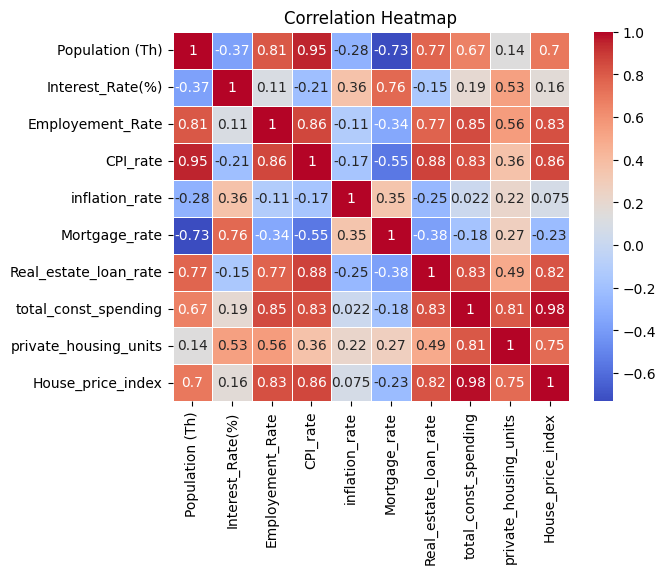

In [ ]:
def heatmap(data):
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Example usage:
# Assuming you have a DataFrame df with numerical columns
heatmap(data=data)

#Split the data as Features and Target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns=['House_price_index'], axis=1)
y = data['House_price_index']

In [ ]:
X

,Population (Th),Interest_Rate(%),Employement_Rate,CPI_rate,inflation_rate,Mortgage_rate,Real_estate_loan_rate,total_const_spending,private_housing_units
0,289412,1.24,130579,191.600,1.754286,5.3040,1782.39686,863855,1049
1,289606,1.26,130443,192.800,1.912632,5.2200,1782.39686,859225,1044
2,289809,1.25,130233,194.100,1.862857,5.0650,1782.39686,851132,1044
3,290024,1.26,130176,193.700,1.774762,5.1175,1782.39686,859459,1043
4,290250,1.26,130197,194.100,1.660952,4.8600,1782.39686,866814,1047
...,...,...,...,...,...,...,...,...,...
236,333976,2.56,153682,322.979,2.382381,5.3500,2748.52020,1836930,1698
237,334141,3.08,154006,324.476,2.393500,6.1450,2773.70380,1830477,1710
238,334287,3.78,154296,325.493,2.371000,6.1375,2797.85720,1842206,1695
239,334420,4.10,154535,327.600,2.259524,5.6680,2872.14400,1840896,1696


In [ ]:
y

0      127.652
1      128.326
2      129.308
3      130.488
4      131.839
        ...   
236    268.044
237    268.044
238    268.044
239    268.044
240    268.044
Name: House_price_index, Length: 241, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Split the data as Features and Target

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

#Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared (R2): {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

R-squared (R2): 0.9734
Mean Absolute Error (MAE): 4.7646


#Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=6, max_features='sqrt')
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared (R2): {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

R-squared (R2): 0.9984
Mean Absolute Error (MAE): 1.2151


#Gradient Boosting

In [ ]:
gb = GradientBoostingRegressor()
gb = gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared (R2): {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

R-squared (R2): 0.9984
Mean Absolute Error (MAE): 1.1998


#XG Boosting

In [ ]:
xg = XGBRegressor(n_estimators=350,
                learning_rate=0.01,
                max_depth=4, reg_lambda=0.2)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared (R2): {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

R-squared (R2): 0.9955
Mean Absolute Error (MAE): 2.1397


#Features selection

In [ ]:
fim = pd.Series(xg.feature_importances_, index= X_train.columns)
print(fim.sort_values(ascending=False))

CPI_rate                 0.475659
Population (Th)          0.284182
total_const_spending     0.204248
Employement_Rate         0.014928
private_housing_units    0.011307
Interest_Rate(%)         0.004725
Real_estate_loan_rate    0.003346
inflation_rate           0.000992
Mortgage_rate            0.000614
dtype: float32


#Import Libraries to save data

In [ ]:
import pickle


In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(xg, file)

In [ ]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
prediction = model.predict(X_test)
print(prediction[0])

163.02728


In [ ]:
data.head()

,Population (Th),Interest_Rate(%),Employement_Rate,CPI_rate,inflation_rate,Mortgage_rate,Real_estate_loan_rate,total_const_spending,private_housing_units,House_price_index
0,289412,1.24,130579,191.6,1.754286,5.3040,1782.39686,863855,1049,127.652
1,289606,1.26,130443,192.8,1.912632,5.2200,1782.39686,859225,1044,128.326
2,289809,1.25,130233,194.1,1.862857,5.0650,1782.39686,851132,1044,129.308
3,290024,1.26,130176,193.7,1.774762,5.1175,1782.39686,859459,1043,130.488
4,290250,1.26,130197,194.1,1.660952,4.8600,1782.39686,866814,1047,131.839


#Model predcition

In [ ]:
import numpy as np

In [ ]:
user_input = (289412,1.24, 130579, 191.6, 1.754286,5.3040,1782.39686,863855,1049)
input_data_as_numpy_array = np.asarray(user_input)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction[0])

131.59235
